In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from pet_document import PetDocument

In [9]:
df = pd.read_parquet("./assets/pet_dataset.parquet")

In [10]:
# Convert to objects
pet_documents = df.to_dict(orient="records")
records = []
# TODO: Refactor
for document in pet_documents:
    converted_document = PetDocument(
        name=document["document name"],
        tokens=document["tokens"],
        tokens_ids=document["tokens-IDs"],
        ner_tags=document["ner_tags"],
        sentence_ids=document["sentence-IDs"],
    )
    converted_document.relations["source_head_sentence_id"] = document[
        "relations.source-head-sentence-ID"
    ]
    converted_document.relations["source_head_word_id"] = document[
        "relations.source-head-word-ID"
    ]
    converted_document.relations["relation_type"] = document["relations.relation-type"]
    converted_document.relations["target_head_sentence_id"] = document[
        "relations.target-head-sentence-ID"
    ]
    converted_document.relations["target_head_word_id"] = document[
        "relations.target-head-word-ID"
    ]
    records.append(converted_document)

In [11]:
# Calculate stats for tokens
total_tokens = 0
for record in records:
    total_tokens += len(record.tokens)


avg_tokens = total_tokens / len(records)


def get_lengths(documents):
    result = []
    for document in documents:
        result.append(len(document.tokens))
    return result


min_tokens = min(get_lengths(records))
max_tokens = max(get_lengths(records))

print("Average number of tokens per document: " + str(avg_tokens))
print("Mininum number of tokens per document: " + str(min_tokens))
print("Maximum number of tokens per document: " + str(max_tokens))

Average number of tokens per document: 168.2
Mininum number of tokens per document: 32
Maximum number of tokens per document: 769


In [12]:
# Calculate stats for ner-tags
ner_tags = []
for record in records:
    ner_tags.extend(record.ner_tags)

ner_tags_counts = Counter(ner_tags)

for string, count in ner_tags_counts.items():
    print(f"{string}: {count}")

# Calculate stats for relations
relations = []
for record in records:
    relations.extend(record.relations["relation_type"])

relations_counts = Counter(relations)

B-Actor: 449
I-Actor: 598
B-Activity: 502
B-Activity Data: 459
I-Activity Data: 1158
O: 3374
B-XOR Gateway: 117
B-Further Specification: 64
I-Further Specification: 268
I-Activity: 49
B-Condition Specification: 80
I-Condition Specification: 403
B-AND Gateway: 8
I-XOR Gateway: 31
I-AND Gateway: 9


In [13]:
# Generate HTML
with open('assets/template.html', 'r') as file:
    html_template = file.read()

data = ""

for record in records:
    html_content = html_template
    html_content = html_content.replace("<!-- TITLE -->", record.name)
    for token, ner_tag in zip(record.tokens, record.ner_tags):
        data += f"<span class='{ner_tag}'>{token}</span>"
    html_content = html_content.replace("<!-- CONTENT  -->", data)
    with open(f"out/{record.name}.html", 'w') as file:
        file.write(html_content)

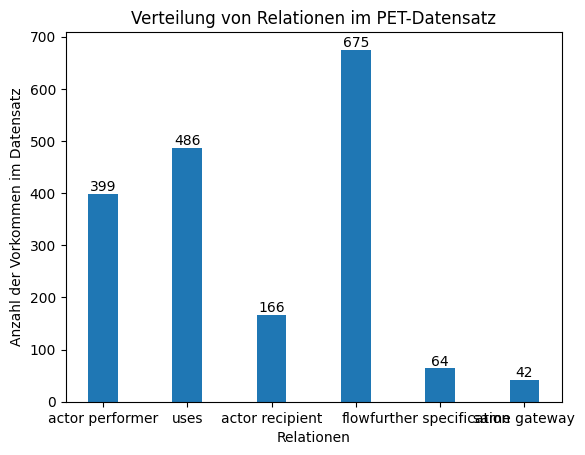

In [14]:
# Plot data
plot_categories = []
plot_values = []

for string, count in relations_counts.items():
    plot_categories.append(string)
    plot_values.append(count)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(plot_categories))

# Create the bar plot
plt.bar(bar_positions, plot_values, width=bar_width)

# Add labels and title
plt.xlabel("Relationen")
plt.ylabel("Anzahl der Vorkommen im Datensatz")
plt.title("Verteilung von Relationen im PET-Datensatz")
plt.xticks(bar_positions, plot_categories)

for i, value in enumerate(plot_values):
    plt.text(bar_positions[i], value + 0.1, str(value), ha="center", va="bottom")

# Display the plot
plt.show()